In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow



In [ ]:
uploaded = files.upload()


Saving circuit_defect.jpg to circuit_defect.jpg


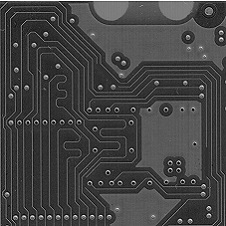

In [ ]:
img = cv2.imread('coins.png')
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
cv2_imshow(img)



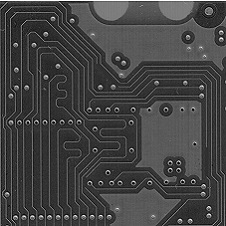

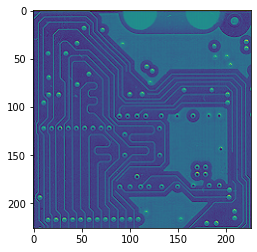

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
cv2_imshow(img_gray)

# histogram_equalization

In [1]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg".split()
    )

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)

First, read the image as grayscale

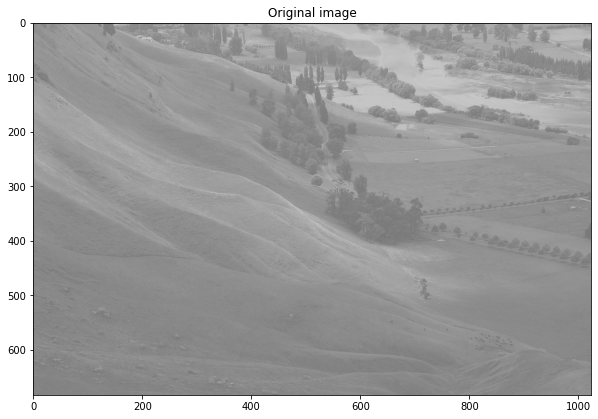

In [3]:
# read as grayscale
I = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg", 0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

Let's start by calculating and showing the original histogram

In [4]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

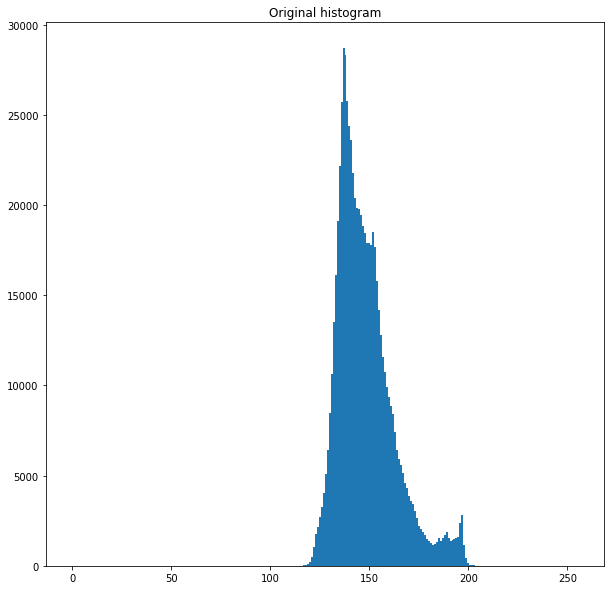

In [5]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()


Normalize the histogram to gat a discrete PDF

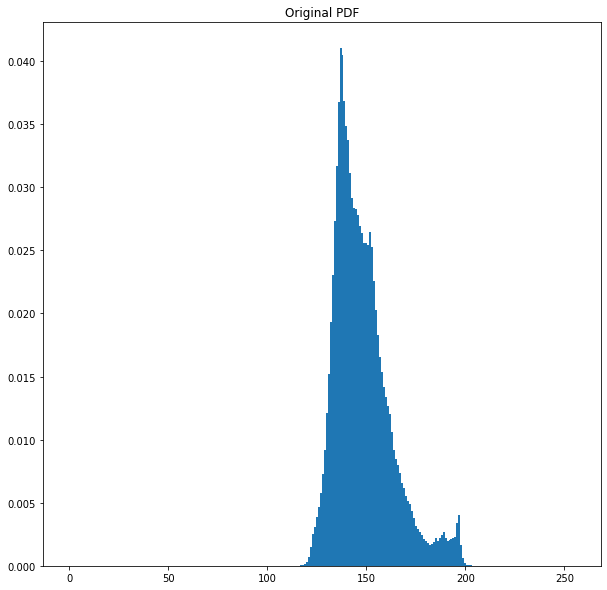

In [6]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()


Get the CDF by calculating the cumulative sum of the pdf data

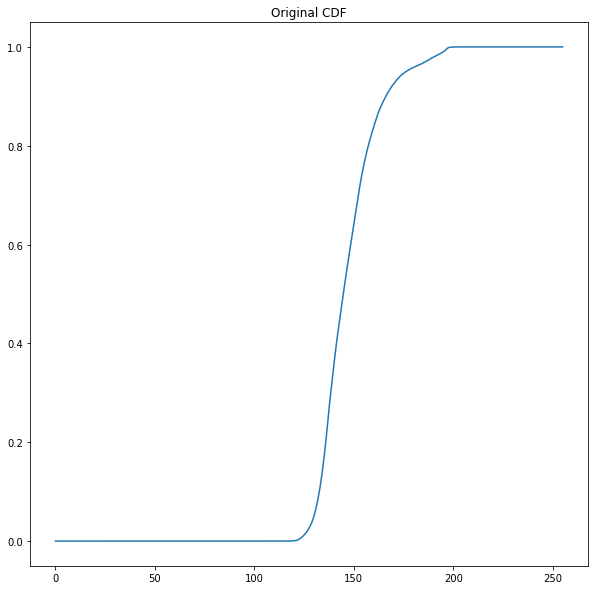

In [7]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

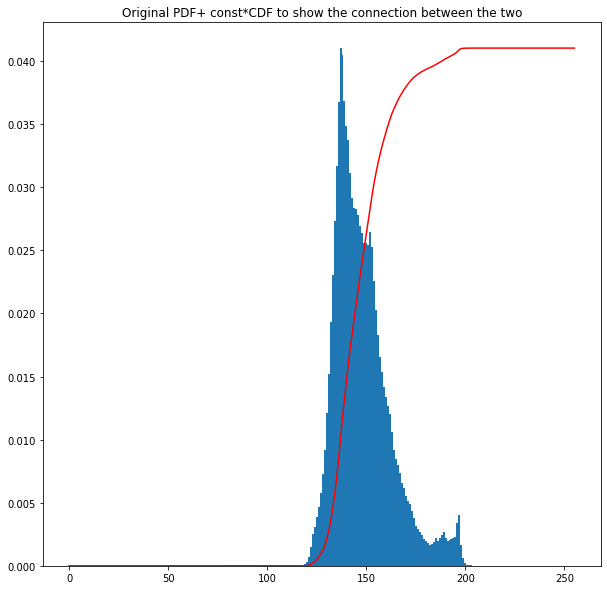

In [8]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()

The final step is to un-normalize the CDF to become the equalization function

In [9]:
f_eq = np.round(cdf * 255).astype(int)

f_eq

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   1,   2,   3,   4,   6,   8,  10,
        13,  17,  22,  28,  35,  43,  52,  63,  73,  82,  91, 100, 108,
       115, 122, 130, 137, 144, 150, 157, 163, 170, 177, 183, 189, 194,
       199, 203, 207, 210, 214, 217, 220, 223, 225, 227, 229, 231, 233,
       235, 236, 237, 238, 240, 241, 241, 242, 243, 243, 244, 24

Use the equalization function to get the equalized image

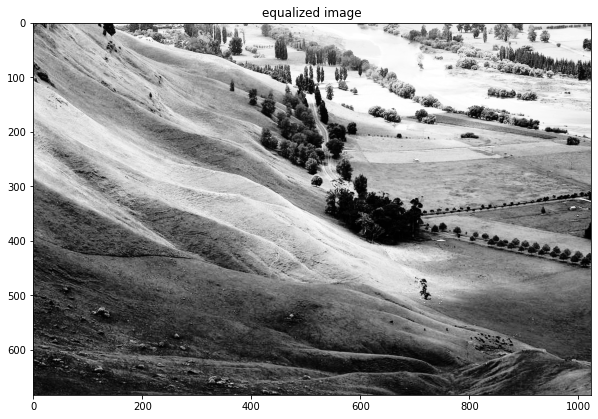

In [10]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()

Plot the equalized histogram, PDF and CDF

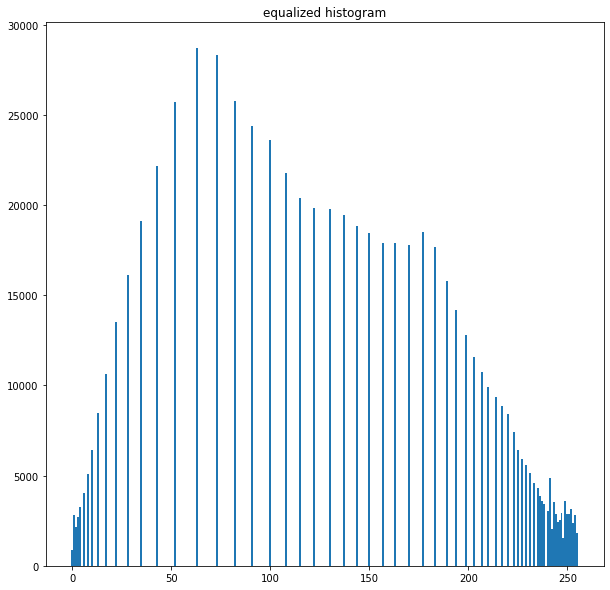

In [11]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()

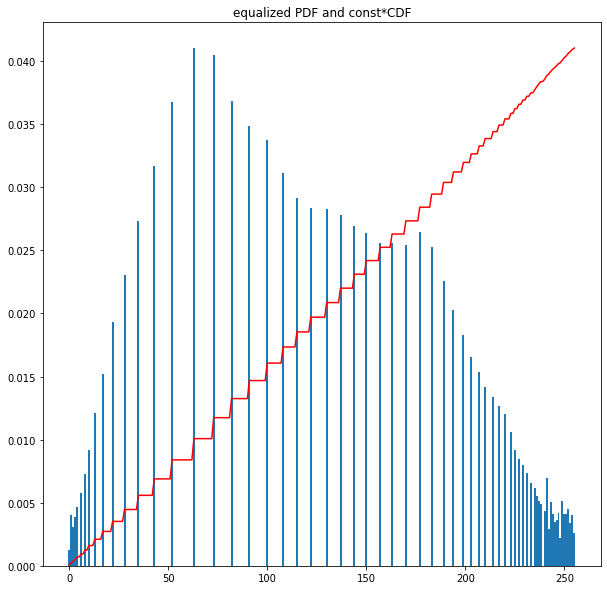

In [12]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()

cv2 histogram equalization function

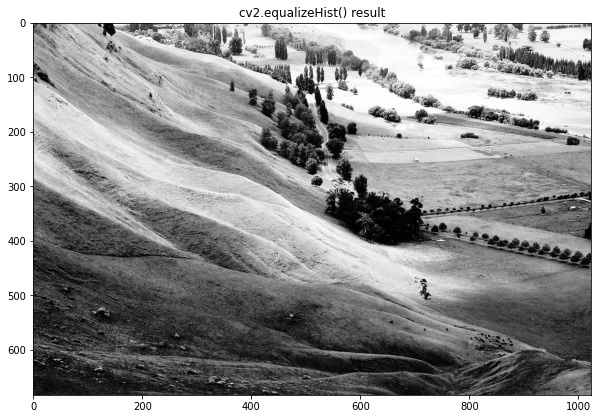

In [13]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()

## Otsu’s Binarization


In [ ]:
th, im_gray_th_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
print(th)

126.0


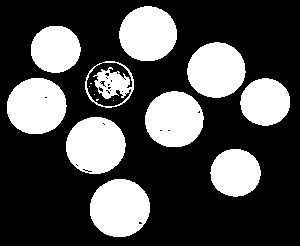

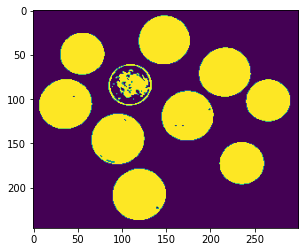

In [ ]:
ret, bw_img = cv2.threshold(img_gray,th,255,cv2.THRESH_BINARY)
plt.imshow(bw_img)
cv2_imshow(bw_img)

so sánh OTSU


In [ ]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

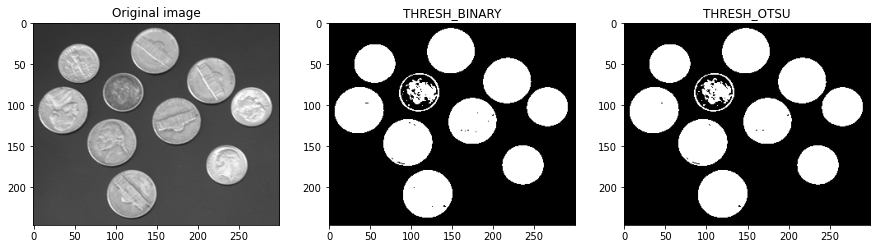

In [ ]:
# global thresholding
ret,img_binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret,img_otsu_binary = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Plot the images
images = [img, img_binary, img_otsu_binary]
titles = ['Original image', 'THRESH_BINARY', 'THRESH_OTSU']
plot_img(images, titles)

# **Morphology**

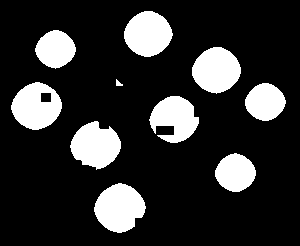

In [ ]:
kernel = np.ones((9,9),np.uint8)
erosion = cv2.erode(img_otsu_binary,kernel,iterations = 1)
cv2_imshow(erosion)

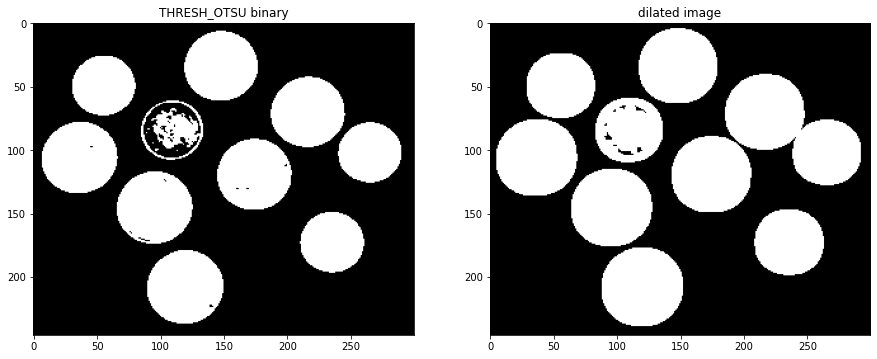

In [ ]:
kernel2 = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img_otsu_binary,kernel2,iterations = 1)
#cv2_imshow(dilation)
images = [img_otsu_binary, dilation]
titles = ['THRESH_OTSU binary', 'dilated image']
plot_img(images, titles)

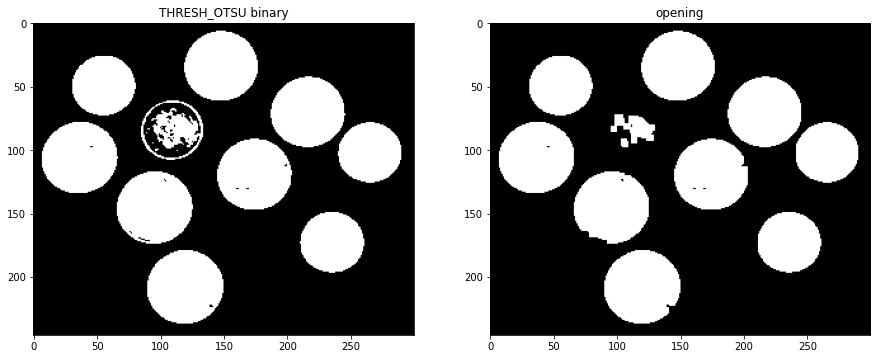

In [ ]:
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img_otsu_binary, cv2.MORPH_OPEN, kernel)
#cv2_imshow(opening)
images = [img_otsu_binary, opening]
titles = ['THRESH_OTSU binary', 'opening']
plot_img(images, titles)

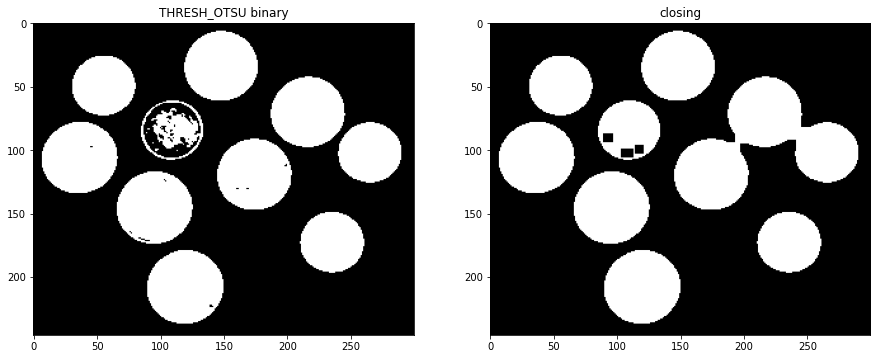

In [ ]:
kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(img_otsu_binary, cv2.MORPH_CLOSE, kernel)
#cv2_imshow(closing)
images = [img_otsu_binary, closing]
titles = ['THRESH_OTSU binary', 'closing']
plot_img(images, titles)

## **Edge detection**

Sobel Derivatives

Sobel Edge Detector

In [ ]:
# 3x3 Y-direction  kernel
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# 3 X 3 X-direction kernel
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_y = cv2.filter2D(img_gray, -1, sobel_y)
filtered_image_x = cv2.filter2D(img_gray, -1, sobel_x)

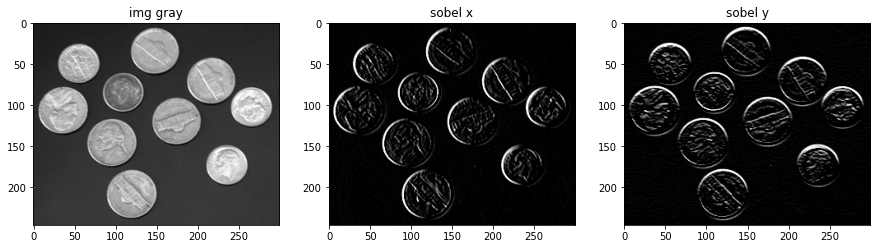

In [ ]:
images = [img_gray,filtered_image_x, filtered_image_y]
titles = ['img gray','sobel x', 'sobel y']
plot_img(images, titles)

In [ ]:
​(fig, (ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25, 25))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('sobel_x')
ax2.imshow(filtered_image_y)
ax3.title.set_text('sobel_y filter')
ax3.imshow(filtered_image_x)
plt.show()

In [ ]:
# Blur the image for better edge detection

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
cv2_imshow(img_blur)


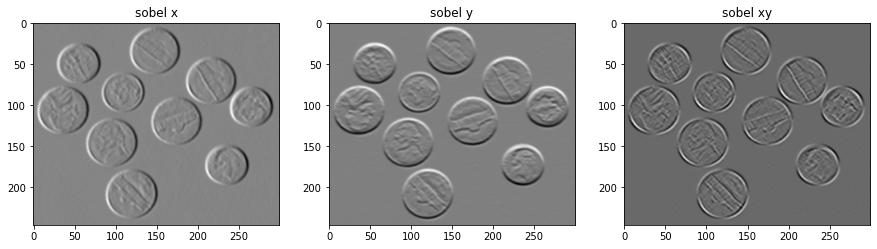

In [ ]:
# Sobel Edge Detection Dung truc tiep

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis

sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
images = [sobelx, sobely,sobelxy]
titles = ['sobel x', 'sobel y','sobel xy']
plot_img(images, titles)

Laplacian Edge Detector
Laplacian edge detector compares the second derivatives of an image. It measures the rate at which first derivative changes in a single pass. Laplacian edge detection uses one kernel and contains negative values in a cross pattern, as shown below.


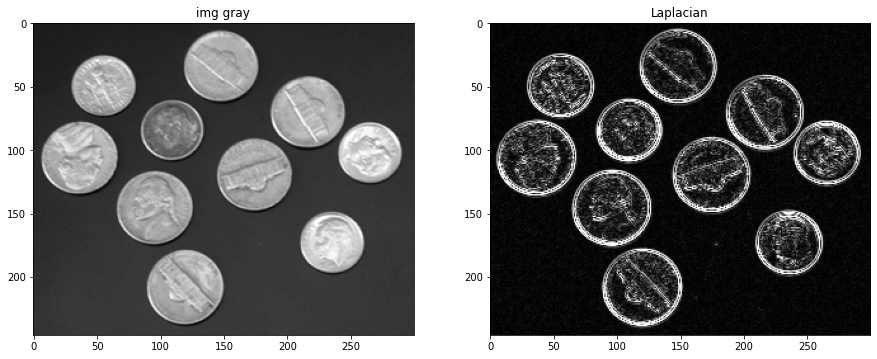

In [ ]:
filtered_image = cv2.Laplacian(img, ksize=3, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
images = [img_gray,filtered_image]
titles = ['img gray','Laplacian']
plot_img(images, titles)

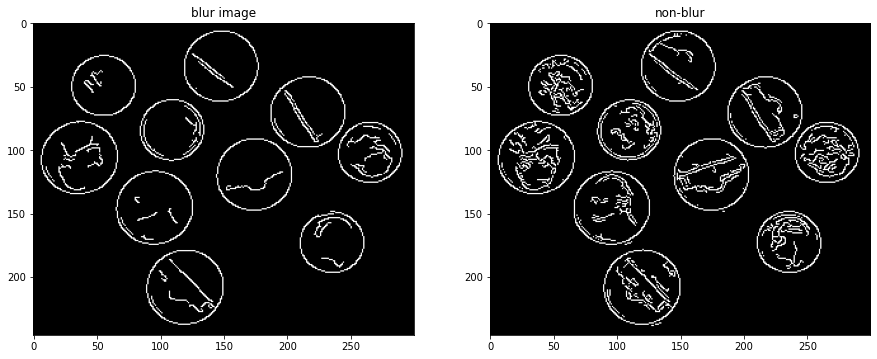

In [ ]:
edges = cv2.Canny(img_blur,100,200)
edges2 = cv2.Canny(img_gray,100,200)
images = [edges,edges2]
titles = ['blur image','non-blur']
plot_img(images, titles)

================================================================================================================

In [ ]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

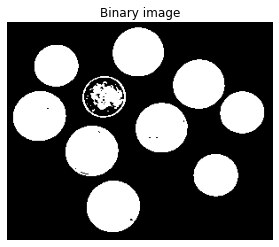

In [ ]:
from skimage.filters import threshold_otsu
from skimage import data, color
img_gray = color.rgb2gray(img)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(img_gray)

# Apply thresholding to the image
binary = img_gray > thresh

# Show the image
show_image(binary, 'Binary image')

## **Hough transform**

In [ ]:
uploaded = files.upload()

Saving Lane_for_Hough.jpg to Lane_for_Hough.jpg


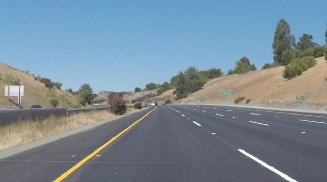

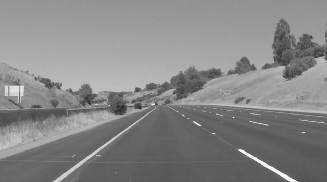

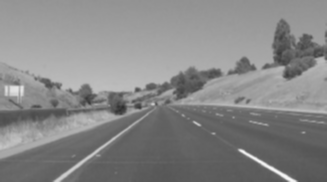

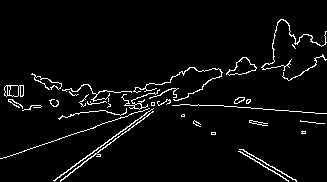

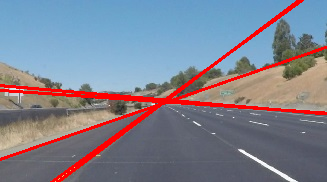

In [ ]:
# read image
#img = cv2.imread('geometry.jpg')
img = cv2.imread('Lane_for_Hough.jpg')
cv2_imshow(img)
# convert to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # color -> gray
cv2_imshow(gray)
image = cv2.GaussianBlur(gray, (3,3), 0)
cv2_imshow(image)
edges = cv2.Canny(image, 100, 200, apertureSize=3)
cv2_imshow(edges)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)    
cv2.imwrite('geo_hough.jpg',img)
cv2_imshow(img)

# **Hough circle**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving coins2.png to coins2.png


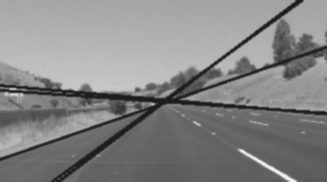

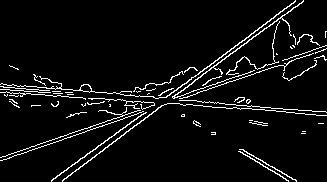

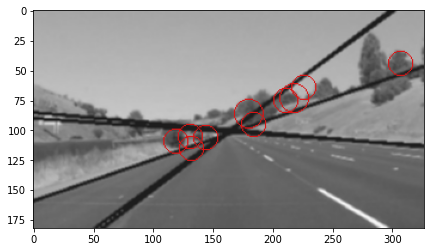

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[160:230, 70:270])
#image = cv2.imread('coins2 (4).png')
image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#edges = canny(image, sigma=3, low_threshold=100, high_threshold=200)
image = cv2.GaussianBlur(image, (3,3), 0)
cv2_imshow(image)
edges = cv2.Canny(image,150,200)
cv2_imshow(edges)

# Detect two radii
hough_radii = np.arange(10, 100, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=10)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()